In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.columns = [
    'id',
    'date',
    'price',
    'bedrooms',
    'bathroooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]
pd.DataFrame(df.columns)

,0
0,id
1,date
2,price
3,bedrooms
4,bathroooms
5,sqft_living
6,sqft_lot
7,floors
8,waterfront
9,view


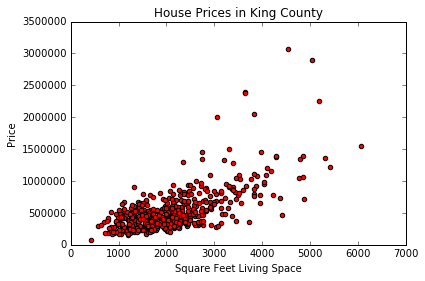

In [3]:
X = df.iloc[0:500, (2,5)].values
plt.scatter(X[:,1], X[:,0], c='r')
plt.ylabel('Price')
plt.ylim(0,3500000)
plt.xlabel('Square Feet Living Space')
plt.title('House Prices in King County')
plt.show()

Data Cleaning

In [4]:
# returns the sum of NaN in each feature
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathroooms       0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# if there are missing data points, dropna() lets us remove those data points
df.dropna()

,id,date,price,bedrooms,bathroooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Additionally for `dropna()` we can give it various parameters that let us conditionally remove rows or columns. Check out these parameters:

- `how` 

- `thresh`

- `subset`


In [6]:
# now we are going to scale down the number of features in order to treat
# the curse of dimensionality

# First off, we don't need separate features for year built and year renovated
# especially considering most houses haven't been renovated, meaning that
# the renovated year feature is largely useless. So instead, we'll combine the two

years_built = df.iloc[:, 14].values
years_ren = df.iloc[:, 15].values
def update_years(built, ren):
    return built if built > ren else ren
update_years = np.vectorize(update_years)
new_feature = update_years(years_built, years_ren)
comparison = np.column_stack((years_built, new_feature))
pd.DataFrame(comparison)

df['yr_built'] = new_feature
del df['yr_renovated']

# Next we'll remove data points that aren't relevant for predicting the price
del df['id']
del df['date']
del df['view'] # no good explanation for what this feature actually is
del df['condition'] # grade offers a better insight than this does
del df['zipcode'] # we already have longitude, latitude, and near-15 for geographic data

df.shape

(21613, 15)

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/chase/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
def test_model(model):
    model.fit(X_train, y_train)
    print('Training Variance Score: %.2f' % ols.score(X_train, y_train))
    print('Test Variance Score: %.2f' % ols.score(X_test, y_test))
    
    # Plot outputs
    plt.scatter(X_test[:,2], y_test,  color='black')
    plt.plot(X_test[:,2], model.predict(X_test), color='blue', linewidth=.5)
    plt.show()

Training Variance Score: 0.68
Test Variance Score: 0.66


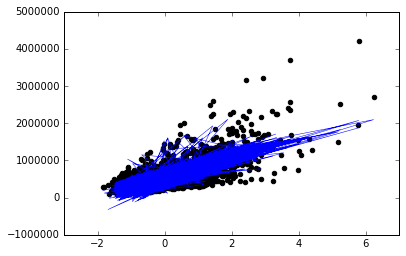

Training Variance Score: 0.68
Test Variance Score: 0.66


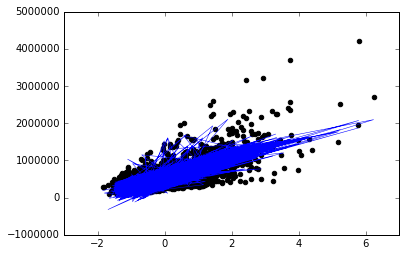

Training Variance Score: 0.68
Test Variance Score: 0.66


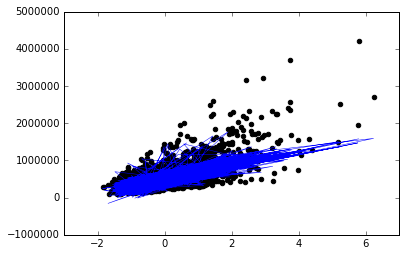

Training Variance Score: 0.68
Test Variance Score: 0.66


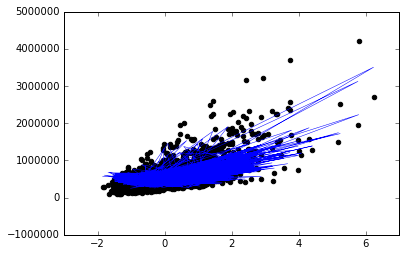

In [9]:
from sklearn import linear_model
from sklearn import svm

# first we'll try ordinary least squares
ols = linear_model.LinearRegression()
test_model(ols)

ridge = linear_model.Ridge(alpha=0.5)
test_model(ridge)

linear_kernel = svm.SVR(kernel='linear', C=1e3)
test_model(linear_kernel)

poly_kernel = svm.SVR(kernel = 'poly', C=1e3, degree=2)
test_model(poly_kernel)

In [10]:
ols.coef_

array([ -3.41784545e+04,   3.13088366e+04,  -3.49044700e+16,
         8.79721536e+03,  -1.63507290e+03,   7.10130627e+04,
         1.12733959e+05,   3.14115134e+16,   1.67678474e+16,
        -7.12080000e+04,   7.69460000e+04,  -2.63401250e+04,
         2.46160000e+04,  -1.13120000e+04])

                0            1
0        bedrooms      34178.5
1      bathroooms      31308.8
2     sqft_living  3.49045e+16
3        sqft_lot      8797.22
4          floors      1635.07
5      waterfront      71013.1
6           grade       112734
7      sqft_above  3.14115e+16
8   sqft_basement  1.67678e+16
9        yr_built        71208
10            lat        76946
11           long      26340.1
12  sqft_living15        24616
13     sqft_lot15        11312


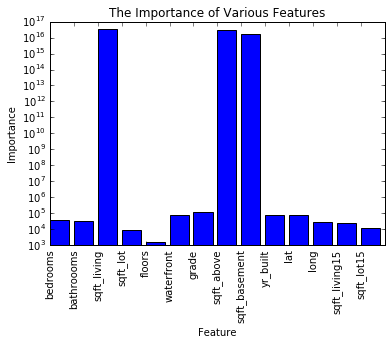

In [11]:
weights = np.column_stack((df.columns[1:], abs(ols.coef_)))
print(pd.DataFrame(weights))
plt.bar(list(range(weights.shape[0])), 
        weights[:,1])
plt.xticks(list(range(weights.shape[0])), weights[:,0], rotation=90)
plt.yscale('log')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('The Importance of Various Features')
plt.show()

/Users/chase/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Variance score: 0.48


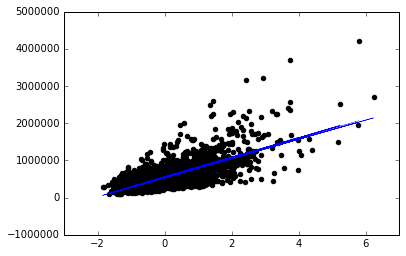

In [12]:
# start afresh with the pruned features
new_data = df.iloc[:, (3, 8, 9)].values
prices = df.iloc[:, 0].values
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_data, prices, test_size=0.15, random_state=0)
new_X_train = scaler.fit_transform(new_X_train)
new_X_test = scaler.transform(new_X_test)
def test_model_pruned(model):
    model.fit(new_X_train, new_y_train)
    print('Variance score: %.2f' % model.score(new_X_test, new_y_test))
    
    # Plot outputs
    plt.scatter(new_X_test[:,0], new_y_test,  color='black')
    plt.plot(new_X_test[:,0], model.predict(new_X_test), color='blue', linewidth=.5)
    plt.show()
    
test_model_pruned(ols)

# we can gather here that although square feet of living space has considerable weight
# in determining the house price, it is not the one-stop factor in its determination. Thus,
# we'll need to keep the other features in the training and test sets

In [13]:
# looking back at the scores, we can see that ols only overfitted a bit
ols.fit(X_train, y_train)
print('Training Variance Score: %.2f' % ols.score(X_train, y_train))
print('Test Variance Score: %.2f' % ols.score(X_test, y_test))

Training Variance Score: 0.68
Test Variance Score: 0.66


Training Variance Score: 0.68
Test Variance Score: 0.66


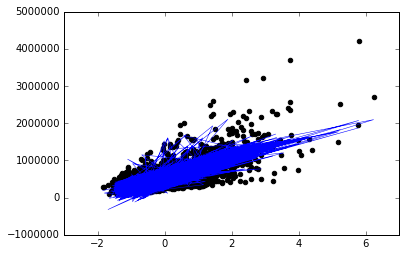

Training Variance Score: 0.68
Test Variance Score: 0.66


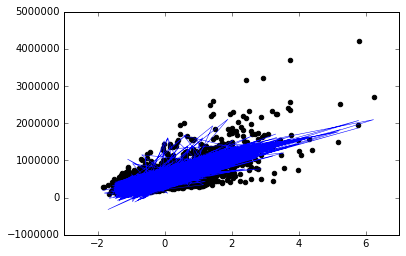

Training Variance Score: 0.68
Test Variance Score: 0.66


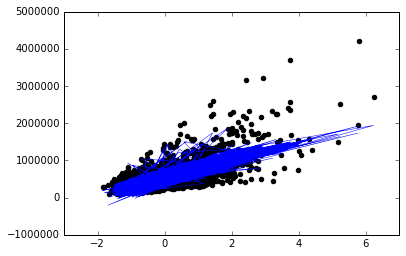

Training Variance Score: 0.68
Test Variance Score: 0.66


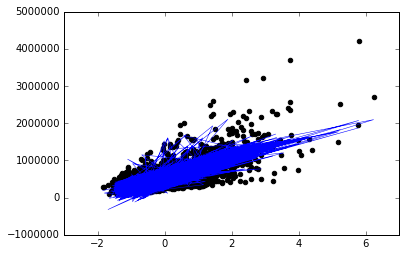

In [14]:
# since there's only a little bit of overfitting, so we should be safe. 
# let's increase the general variance score by optimizing the hyperparameters
# because the LinearRegression doesn't have any hyperparameters, we'll use the 
# Ridge Regression class, which has a penalty parameter

test_model(linear_model.Ridge(alpha=0.5))
test_model(linear_model.Ridge(alpha=0.05))
test_model(linear_model.Ridge(alpha=5000))
test_model(linear_model.Ridge(alpha=0.5, max_iter=3000))

Because all of these models had a 0.68 variance score, we can assume that they all converge to the maximum realistic accuracy, due to possibly misleading inferences from the data that prevents the models from reaching true convergence. Likely factors include houses being sold for much higher than / much lower than the usual market price, unforseen human biases on location such as the closeness of schools and shopping centers, and haggling between realtors and their clients. Thus, we can conclude that the humble ordinary least squares model will return a sufficiently high accuracy and is ready to be implemented.